Fetching ASNs for Pakistan...
Found 380 ASNs: ['4615', '4661', '7590', '7605', '9260', '9387', '9541', '9557', '9937', '9940', '10112', '17539', '17557', '17563', '17787', '17911', '18053', '18173', '18212', '18359', '23607', '23674', '23750', '23888', '23966', '24051', '24105', '24435', '24440', '24499', '37973', '38193', '38196', '38264', '38488', '38547', '38584', '38616', '38710', '38713', '38808', '45127', '45195', '45246', '45252', '45446', '45595', '45605', '45669', '45748', '45773', '45779', '45814', '45843', '45939', '55340', '55356', '55399', '55414', '55453', '55483', '55501', '55534', '55541', '55714', '55816', '56052', '56126', '56167', '56192', '58468', '58470', '58506', '58512', '58515', '58602', '58609', '58614', '58617', '58626', '58746', '58876', '58893', '58895', '58974', '58987', '59254', '59257', '59323', '63954', '64093', '131220', '131275', '131471', '132165', '132285', '132386', '132480', '132683', '132741', '132788', '132872', '132891', '133141', '133170', '133

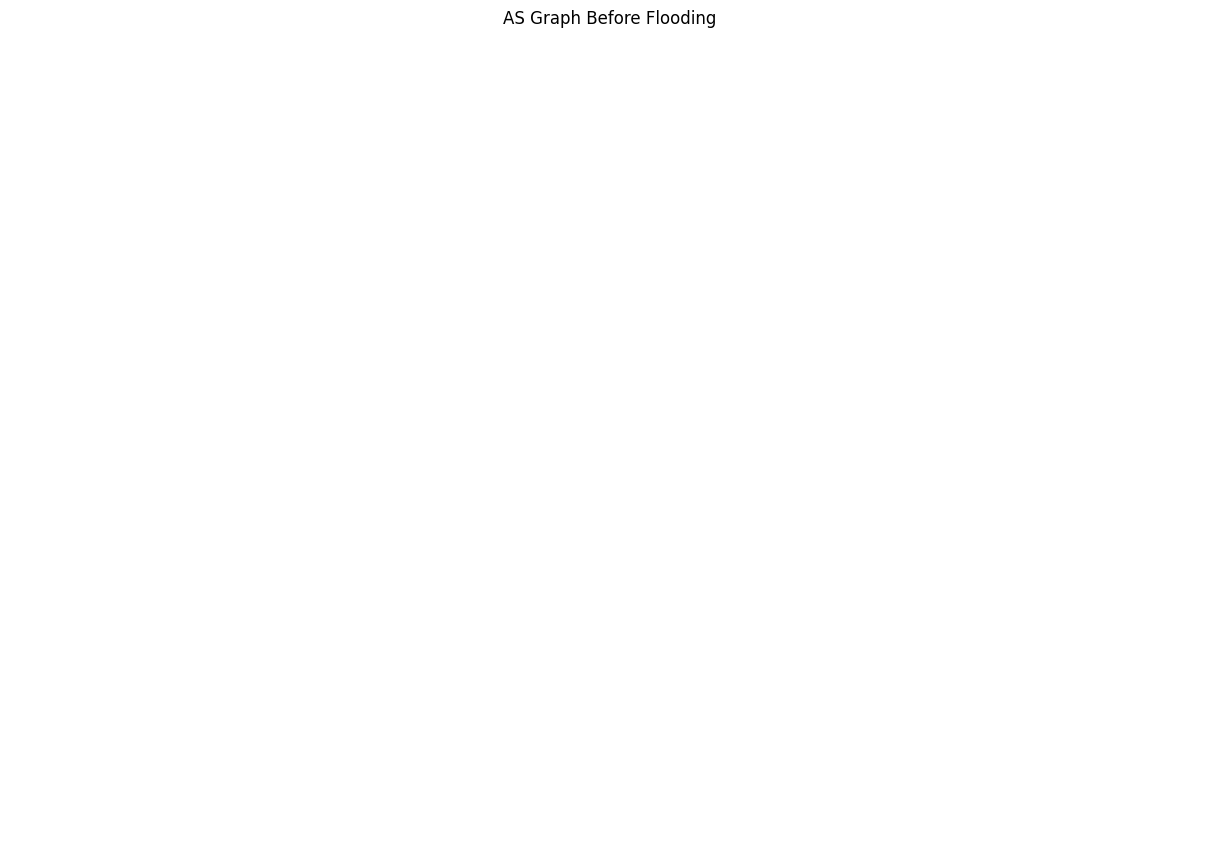

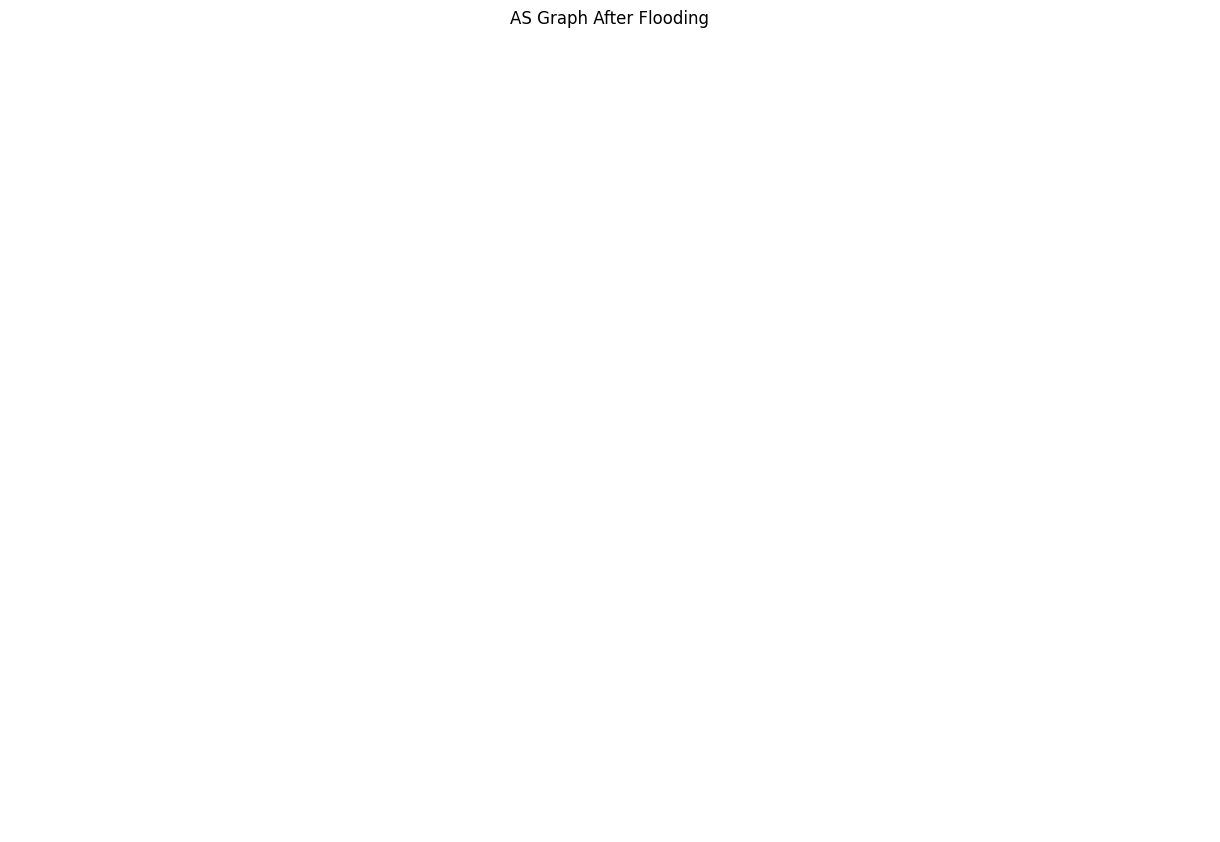

Comparing AS graphs...
Before Flooding: Nodes = 0, Edges = 0
After Flooding: Nodes = 0, Edges = 0
Comparison complete.


In [1]:
import requests
import time
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime

# Helper function to fetch BGP update data for a specific ASN and time range
def fetch_bgp_update_data(asn, start_time, end_time):
    url = f"https://stat.ripe.net/data/bgp-updates/data.json?resource=AS{asn}&starttime={start_time}&endtime={end_time}"
    response = requests.get(url)
    if response.status_code == 200:
        print(asn)
        return response.json()['data']['updates']
    else:
        print(f"Failed to fetch data for AS{asn}: {response.status_code}")
        return []

# Helper function to fetch all ASNs for a country (Pakistan in this case)
def fetch_asns_for_country(country_code):
    url = f"https://stat.ripe.net/data/country-resource-list/data.json?resource={country_code}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()['data']
        asns = data['resources'].get('asn', [])
        return asns
    else:
        print(f"Failed to fetch ASNs for country {country_code}: {response.status_code}")
        return []

# Extract AS paths from BGP updates
def extract_as_paths(bgp_data):
    as_paths = []
    for update in bgp_data:
        if 'path' in update:
            path = update['path'].split()
            as_paths.append(path)
    return as_paths

# Create AS graph from AS paths
def create_as_graph(as_paths):
    G = nx.Graph()
    for path in as_paths:
        for i in range(len(path) - 1):
            G.add_edge(path[i], path[i + 1])
    return G

# Plot AS graph
def plot_graph(G, title):
    plt.figure(figsize=(12, 8))
    nx.draw(G, with_labels=True, node_size=50, font_size=10)
    plt.title(title)
    plt.show()

# Compare AS graphs
def compare_graphs(G_before, G_after):
    num_nodes_before = len(G_before.nodes())
    num_edges_before = len(G_before.edges())
    num_nodes_after = len(G_after.nodes())
    num_edges_after = len(G_after.edges())

    print(f"Before Flooding: Nodes = {num_nodes_before}, Edges = {num_edges_before}")
    print(f"After Flooding: Nodes = {num_nodes_after}, Edges = {num_edges_after}")

# Example usage
country_code = 'PK'  # Pakistan
start_date_before = '2022-03-01'
end_date_before = '2022-03-02'
start_date_after = '2022-10-01'
end_date_after = '2022-10-02'

start_time_before = datetime.strptime(start_date_before, "%Y-%m-%d").isoformat()
end_time_before = datetime.strptime(end_date_before, "%Y-%m-%d").isoformat()
start_time_after = datetime.strptime(start_date_after, "%Y-%m-%d").isoformat()
end_time_after = datetime.strptime(end_date_after, "%Y-%m-%d").isoformat()

# Fetch ASNs for Pakistan
print("Fetching ASNs for Pakistan...")
asns = fetch_asns_for_country(country_code)
print(f"Found {len(asns)} ASNs: {asns}")

# Fetch BGP data for all ASNs in Pakistan for both time periods
bgp_data_before = []
bgp_data_after = []
print("Fetching BGP data for the period before flooding...")
for asn in asns:
    bgp_data_before += fetch_bgp_update_data(asn, start_time_before, end_time_before)
    time.sleep(1)  # To avoid hitting the rate limit
print(f"Fetched BGP data for {len(asns)} ASNs before flooding.")

print("Fetching BGP data for the period after flooding...")
for asn in asns:
    bgp_data_after += fetch_bgp_update_data(asn, start_time_after, end_time_after)
    time.sleep(1)  # To avoid hitting the rate limit
print(f"Fetched BGP data for {len(asns)} ASNs after flooding.")

# Extract AS paths
print("Extracting AS paths from BGP data...")
as_paths_before = extract_as_paths(bgp_data_before)
as_paths_after = extract_as_paths(bgp_data_after)
print(f"Extracted {len(as_paths_before)} AS paths before flooding.")
print(f"Extracted {len(as_paths_after)} AS paths after flooding.")

# Create AS graphs
print("Creating AS graphs...")
G_before = create_as_graph(as_paths_before)
G_after = create_as_graph(as_paths_after)
print("AS graphs created.")

# Plot graphs
print("Plotting AS graphs...")
plot_graph(G_before, 'AS Graph Before Flooding')
plot_graph(G_after, 'AS Graph After Flooding')

# Compare graphs
print("Comparing AS graphs...")
compare_graphs(G_before, G_after)
print("Comparison complete.")


In [ ]:
import json
with open('bgp_data_before.json', 'w') as f:
    json.dump(bgp_data_before, f)

with open('bgp_data_after.json', 'w') as f:
    json.dump(bgp_data_after, f)

In [1]:
import json

# Load BGP data from JSON files
with open('bgp_data_before.json', 'r') as f:
    bgp_data_before = json.load(f)

with open('bgp_data_after.json', 'r') as f:
    bgp_data_after = json.load(f)

Extracted 2033421 AS paths before flooding.
Extracted 3771249 AS paths after flooding.
Creating AS graphs...
AS graphs created.
Plotting AS graphs...


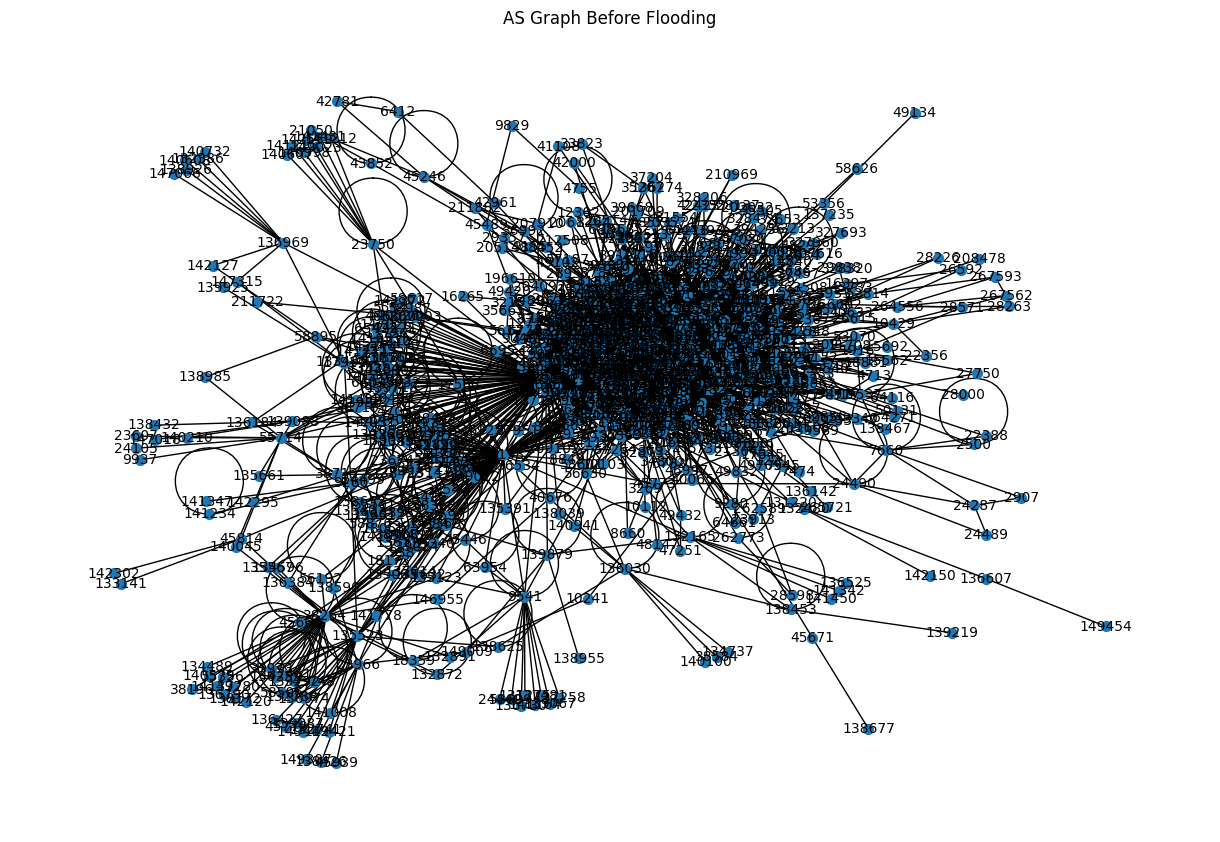

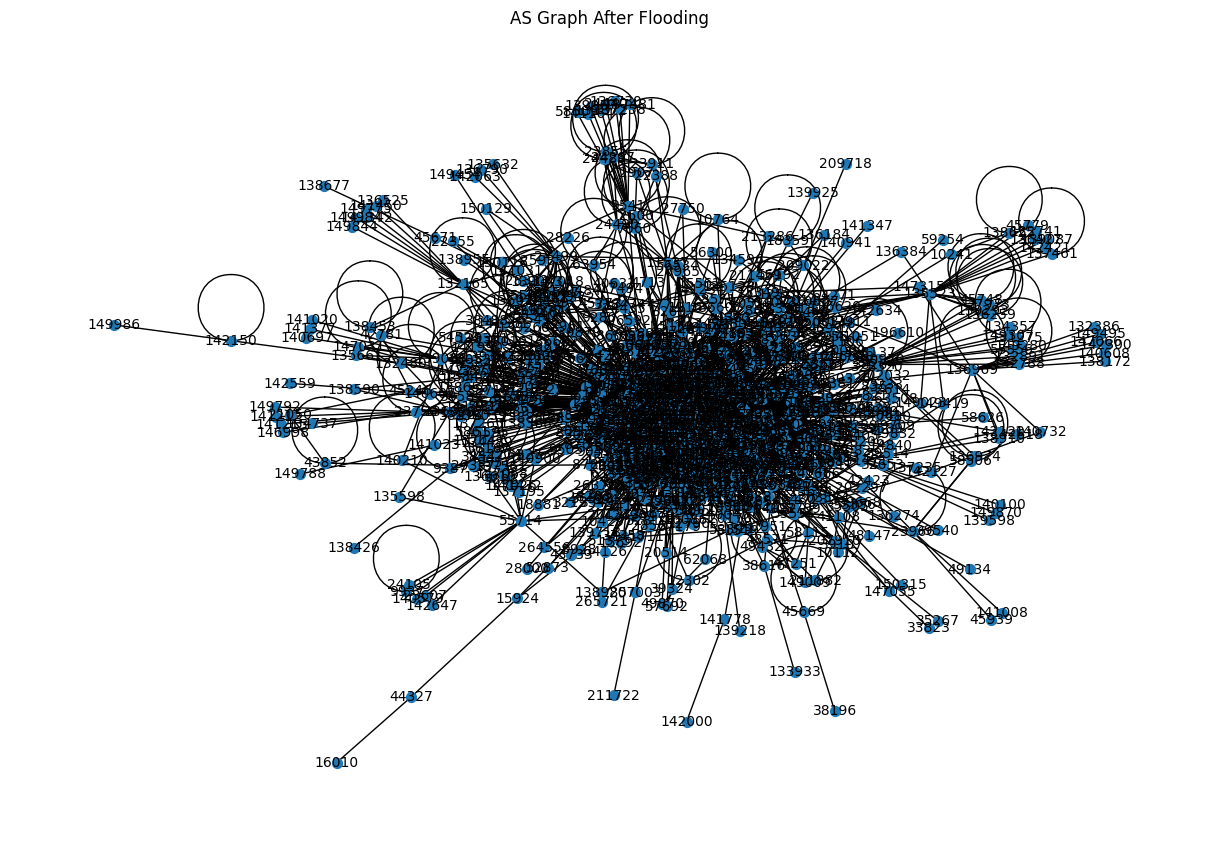

Comparing AS graphs...
Before Flooding: Nodes = 815, Edges = 3750
After Flooding: Nodes = 856, Edges = 4188
Comparison complete.


In [4]:
import requests
import time
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime

def extract_as_paths(bgp_data):
    as_paths = []
    for update in bgp_data:
        if 'attrs' in update and 'path' in update['attrs']:
            path = update['attrs']['path']
            as_paths.append(path)
    return as_paths

# Create AS graph from AS paths
def create_as_graph(as_paths):
    G = nx.Graph()
    for path in as_paths:
        for i in range(len(path) - 1):
            G.add_edge(path[i], path[i + 1])
    return G

# Plot AS graph
def plot_graph(G, title):
    plt.figure(figsize=(12, 8))
    nx.draw(G, with_labels=True, node_size=50, font_size=10)
    plt.title(title)
    plt.show()

# Compare AS graphs
def compare_graphs(G_before, G_after):
    num_nodes_before = len(G_before.nodes())
    num_edges_before = len(G_before.edges())
    num_nodes_after = len(G_after.nodes())
    num_edges_after = len(G_after.edges())

    print(f"Before Flooding: Nodes = {num_nodes_before}, Edges = {num_edges_before}")
    print(f"After Flooding: Nodes = {num_nodes_after}, Edges = {num_edges_after}")

# Extract AS paths
as_paths_before = extract_as_paths(bgp_data_before)
as_paths_after = extract_as_paths(bgp_data_after)
print(f"Extracted {len(as_paths_before)} AS paths before flooding.")
print(f"Extracted {len(as_paths_after)} AS paths after flooding.")

# Create AS graphs
print("Creating AS graphs...")
G_before = create_as_graph(as_paths_before)
G_after = create_as_graph(as_paths_after)
print("AS graphs created.")

# Plot graphs
print("Plotting AS graphs...")
plot_graph(G_before, 'AS Graph Before Flooding')
plot_graph(G_after, 'AS Graph After Flooding')

# Compare graphs
print("Comparing AS graphs...")
compare_graphs(G_before, G_after)
print("Comparison complete.")

In [5]:
def extract_as_paths(bgp_data):
    as_paths = []
    for update in bgp_data:
        if 'attrs' in update and 'path' in update['attrs']:
            path = update['attrs']['path']
            as_paths.append(path)
    return as_paths

# Create AS graph from AS paths
def create_as_graph(as_paths):
    G = nx.Graph()
    for path in as_paths:
        for i in range(len(path) - 1):
            G.add_edge(path[i], path[i + 1])
    return G

# Plot AS graph with node size proportional to in-degree
def plot_graph(G, title):
    plt.figure(figsize=(12, 8))
    in_degrees = dict(G.in_degree())
    node_sizes = [v * 10 for v in in_degrees.values()]  # Scale node size for better visualization
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=node_sizes, font_size=10)
    plt.title(title)
    plt.show()

# Compare AS graphs
def compare_graphs(G_before, G_after):
    num_nodes_before = len(G_before.nodes())
    num_edges_before = len(G_before.edges())
    num_nodes_after = len(G_after.nodes())
    num_edges_after = len(G_after.edges())

    print(f"Before Flooding: Nodes = {num_nodes_before}, Edges = {num_edges_before}")
    print(f"After Flooding: Nodes = {num_nodes_after}, Edges = {num_edges_after}")

# Extract AS paths
as_paths_before = extract_as_paths(bgp_data_before)
as_paths_after = extract_as_paths(bgp_data_after)
print(f"Extracted {len(as_paths_before)} AS paths before flooding.")
print(f"Extracted {len(as_paths_after)} AS paths after flooding.")

# Create AS graphs
print("Creating AS graphs...")
G_before = create_as_graph(as_paths_before)
G_after = create_as_graph(as_paths_after)
print("AS graphs created.")

# Plot graphs
print("Plotting AS graphs...")
plot_graph(G_before, 'AS Graph Before Flooding')
plot_graph(G_after, 'AS Graph After Flooding')

# Compare graphs
print("Comparing AS graphs...")
compare_graphs(G_before, G_after)
print("Comparison complete.")

Extracted 2033421 AS paths before flooding.
Extracted 3771249 AS paths after flooding.
Creating AS graphs...
AS graphs created.
Plotting AS graphs...


AttributeError: 'Graph' object has no attribute 'in_degree'

<Figure size 1200x800 with 0 Axes>

Extracted 2033421 AS paths before flooding.
Extracted 3771249 AS paths after flooding.
Creating AS graphs...
AS graphs created.
Plotting AS graphs...


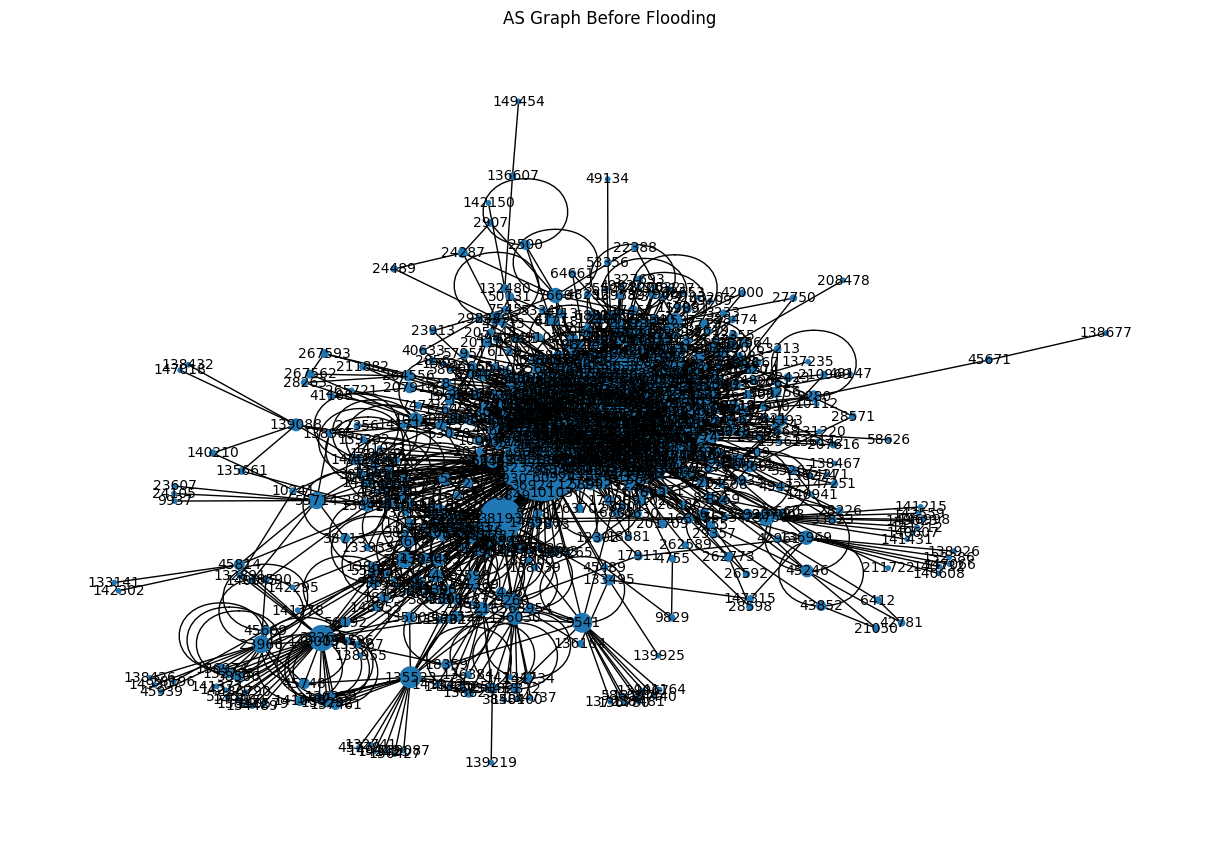

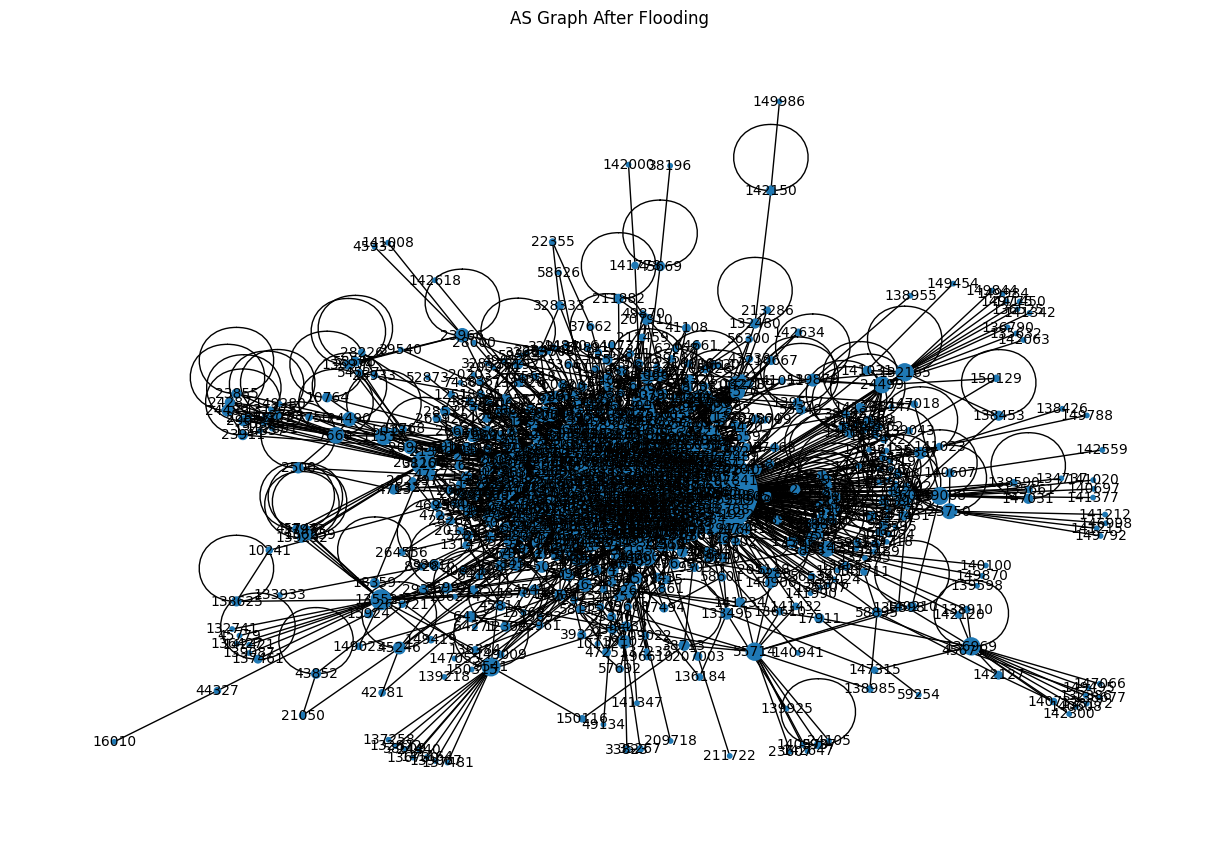

Comparing AS graphs...
Before Flooding: Nodes = 815, Edges = 3750
After Flooding: Nodes = 856, Edges = 4188
Comparison complete.


In [6]:
def extract_as_paths(bgp_data):
    as_paths = []
    for update in bgp_data:
        if 'attrs' in update and 'path' in update['attrs']:
            path = update['attrs']['path']
            as_paths.append(path)
    return as_paths

# Create AS graph from AS paths
def create_as_graph(as_paths):
    G = nx.Graph()
    for path in as_paths:
        for i in range(len(path) - 1):
            G.add_edge(path[i], path[i + 1])
    return G

# Plot AS graph with node size proportional to degree
def plot_graph(G, title):
    plt.figure(figsize=(12, 8))
    degrees = dict(G.degree())
    node_sizes = [v * 10 for v in degrees.values()]  # Scale node size for better visualization
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=node_sizes, font_size=10)
    plt.title(title)
    plt.show()

# Compare AS graphs
def compare_graphs(G_before, G_after):
    num_nodes_before = len(G_before.nodes())
    num_edges_before = len(G_before.edges())
    num_nodes_after = len(G_after.nodes())
    num_edges_after = len(G_after.edges())

    print(f"Before Flooding: Nodes = {num_nodes_before}, Edges = {num_edges_before}")
    print(f"After Flooding: Nodes = {num_nodes_after}, Edges = {num_edges_after}")

# Extract AS paths
as_paths_before = extract_as_paths(bgp_data_before)
as_paths_after = extract_as_paths(bgp_data_after)
print(f"Extracted {len(as_paths_before)} AS paths before flooding.")
print(f"Extracted {len(as_paths_after)} AS paths after flooding.")

# Create AS graphs
print("Creating AS graphs...")
G_before = create_as_graph(as_paths_before)
G_after = create_as_graph(as_paths_after)
print("AS graphs created.")

# Plot graphs
print("Plotting AS graphs...")
plot_graph(G_before, 'AS Graph Before Flooding')
plot_graph(G_after, 'AS Graph After Flooding')

# Compare graphs
print("Comparing AS graphs...")
compare_graphs(G_before, G_after)
print("Comparison complete.")